In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets._samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

x, y = make_blobs(n_samples=10000,
                  n_features=3,
                  centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1, ], [2, 2, 2]],
                  random_state=9,
                  cluster_std=[.2, .1, .2, .2])
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(x[:,0],x[:,1],x[:,2])

In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# 生成一个随机的非负矩阵
V = np.array([[1, 2, 64], 
              [2, 2, 14], 
              [3, 3, 24], 
              [2, 2, 34], 
              [7, 3, 4]])

# 使用 sklearn 库中的 NMF 模型进行分解
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(V)
H = model.components_

# 计算重构误差
reconstruction_error = np.linalg.norm(V - W @ H)

# 打印结果
print("原始矩阵 V:\n", V)
print("分解后的矩阵 W:\n", W)
print("分解后的矩阵 H:\n", H)
print("重构误差:", reconstruction_error)


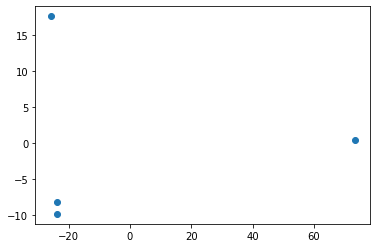

In [2]:
pca = PCA(n_components=2)
pca.fit(x)
new = pca.transform(x)
x = np.array([[3, 2, 3, 15, 2], [0, 1, 1, 2, 99], [1, 11, 1, 8, 2], [8, 10, 26, 2, 2]])
r = pca.fit_transform(x)
plt.scatter(r[:,0],r[:,1])

In [ ]:
pca = PCA(n_components=10, svd_solver='arpack', random_state=0)
new = pca.fit_transform(exp.toarray())

In [3]:
from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 9], [0, 1, 6], [0, 2, 20], [1, 0, 18], [1, 1, 24], [1, 2, 20]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

print(neigh.kneighbors([[2, 0, 16]]))


(array([[2.23606798]]), array([[3]], dtype=int64))


In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [ ]:
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

In [36]:
X_norm = sc.pp.normalize_total(
    adata, target_sum=1, exclude_highly_expressed=True,
    max_fraction=.25, inplace=False)['X']
X_norm


array([[ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5,  0.5,  0.5,  1. ,  1. ],
       [ 0.5, 11. ,  0.5,  1. ,  1. ]], dtype=float32)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('test.png')
img = img.resize((300,300))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 灰度图像
# open to see how to use: cv2.Canny
# http://blog.csdn.net/on2way/article/details/46851451

# hough transform
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30,
#                         minLineLength=100, maxLineGap=10)
# lines1 = lines[:, 0, :]  # 提取为二维
# for x1, y1, x2, y2 in lines1[:]:
#     cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

# plt.subplot(122), plt.imshow(img,)
# plt.xticks([]), plt.yticks([])


In [ ]:
edges = cv2.Canny(image=gray,
                  threshold1=50,
                  threshold2=200)
plt.figure(dpi=400)
plt.subplot(121), plt.imshow(edges, 'gray')
plt.xticks([]), plt.yticks([])
print(edges.shape)

<AxesSubplot:ylabel='Count'>

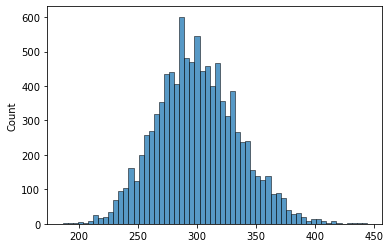

In [74]:
import numpy as np
import seaborn as sns
s = np.random.negative_binomial(100, .25, 10000)
sns.histplot(s)

In [92]:
import tangram as tg

Text(0, 0.5, 'PC2')

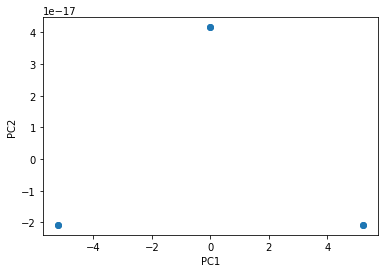

In [107]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 定义A和B两个样本数据
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[11, 12, 13], [14, 15, 16], [17, 18, 19]])

# 将A和B进行主成分分析
pca_A = PCA(n_components=2).fit_transform(A)
pca_B = PCA(n_components=2).fit_transform(B)

# 将A和B的主成分分析结果合并在一起
pca_AB = np.concatenate((pca_A, pca_B), axis=0)

# 对合并后的结果进行主成分分析
pca_final = PCA(n_components=2).fit_transform(pca_AB)

# 对合并后的结果进行聚类
kmeans = KMeans(n_clusters=2).fit(pca_final)

# 输出聚类结果

plt.scatter(pca_final[:, 0], pca_final[:, 1],  cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [226]:
import pandas as pd
import anndata as ad
ctrl = pd.read_csv('E:/GSM4983265_IEC_Stroma_control-lognorm_count.txt', index_col=0)

In [355]:
adata = ad.AnnData(ctrl.T)

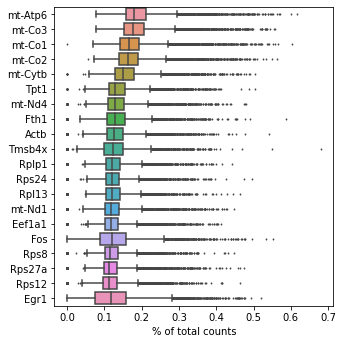

In [333]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [243]:
adata.var_names = ctrl.index
adata.obs_names = ctrl.columns

In [356]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [357]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

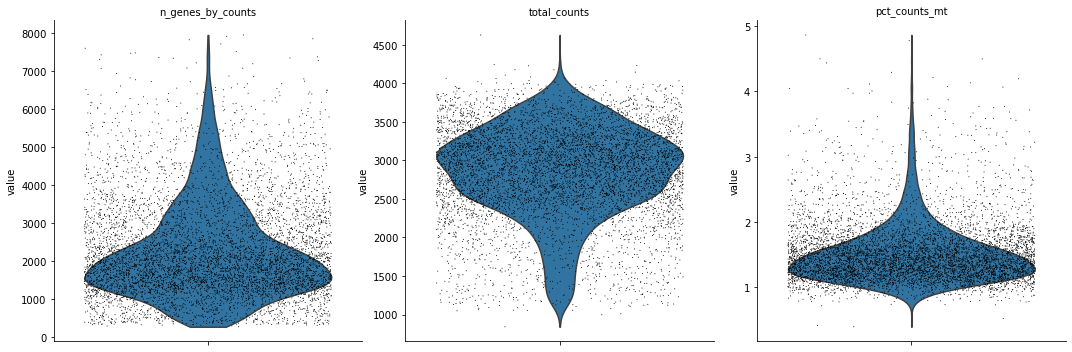

In [358]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

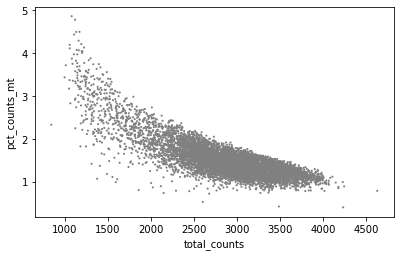

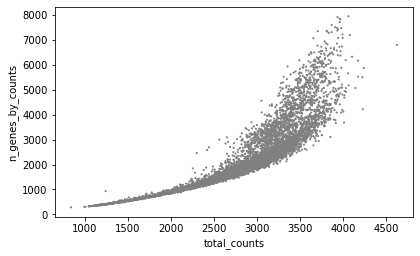

In [359]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [360]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 3, :]

In [361]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

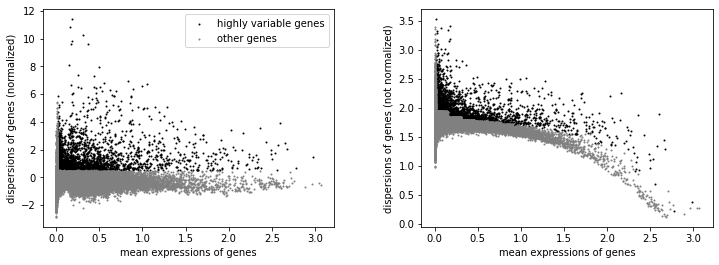

In [362]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [340]:
adata = adata[:, adata.var.highly_variable]

In [366]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [363]:
sc.pp.scale(adata, max_value=10)

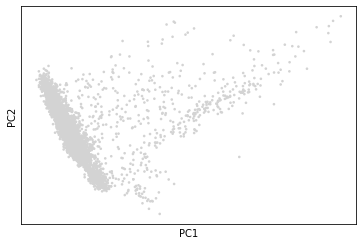

In [364]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pl.pca(adata)

In [365]:
adata.obsm['X_pca'].shape

(4412, 50)

In [346]:
adata

AnnData object with n_obs × n_vars = 4412 × 2644
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

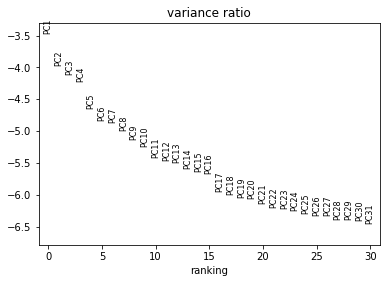

In [347]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])



In [28]:
stretched_gaussian

array([[ 1.46061587e+00,  1.37742372e+00],
       [ 8.33361017e-01,  8.27730147e-01],
       [-2.06520176e+00,  5.71133689e-01],
       [-5.81244934e+00, -1.08514728e+00],
       [-1.32701647e+00, -3.46006805e-01],
       [-4.56134964e+00,  3.07379411e-01],
       [ 3.13444595e+00,  2.03305131e-01],
       [ 1.41666634e+00,  3.75669316e-01],
       [ 1.15368044e+00,  7.40455932e-02],
       [-5.27449439e+00, -1.95508768e+00],
       [-1.33703134e+00, -7.40928782e-01],
       [-1.05787406e+00, -5.45935573e-02],
       [-4.29168667e+00, -5.95734353e-01],
       [ 5.84830061e+00,  1.04132268e+00],
       [-4.84764957e-03,  3.83235844e-02],
       [-4.11160912e-01,  3.98877144e-01],
       [-1.29584854e+00, -5.85486207e-01],
       [ 1.41142589e+00,  5.99948007e-01],
       [ 8.83738195e-01,  8.19350978e-01],
       [ 4.75981990e+00,  3.77738721e-01],
       [ 4.78659034e+00,  1.02058547e+00],
       [-3.48674424e+00, -1.42143577e+00],
       [-1.06737273e+00,  6.39082412e-01],
       [-2.

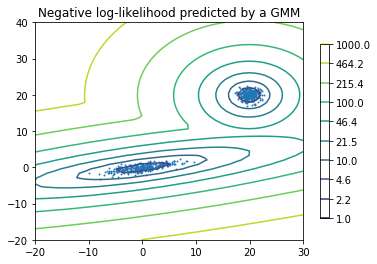

In [29]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()